In [125]:
#"Elvis, Jamil, Jacob certify that the code and data in this assignment were generated independently, using only the tools
#and resources defined in the course and that we did not receive any external help, coaching, or contributions
#during the production of this work."

import argparse
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pydot
import matplotlib.pyplot as plt
from fileData import *
from netEnv import *
from dqnAgent import *
import time
import pickle
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import cmocean
from math import sqrt
import random

code_path = ".."
#code_path = sys.path[0]


In [126]:
requiredFields = ['FileCount', 'AvgFileSize', 'BufSize', 'Bandwidth', 'AvgRtt', 'CC_Level', 'P_Level', 'PP_Level',
                  'numActiveCores', 'frequency', 'TotalAvgTput', 'TotalEnergy', 'DataTransferEnergy']
LabelName = 'TotalAvgTput'
fileData_chameleon = ReadFile(code_path + '/Dataset/Chameleon_Combined_all.csv', requiredFields)
optimal_throughput_dictionary_chameleon = fileData_chameleon.return_map_for_tuple_to_throughput()
filedata_grouped_df = fileData_chameleon.get_grouped_df()
print(
    "There are total %d number of groups based on FileCount, AvgFileSize,BufSize, Bandwidth, AvgRtt" % filedata_grouped_df.ngroups)
# total_test_log=0
# for key in filedata_grouped_df.groups.keys():
#     print(f"group key is {key}")
#     key_specific_test_logs=fileData_chameleon.return_group_specific_test_logs(key)
#     total_test_log+=len(key_specific_test_logs)
#     print(f"key_specific_test_logs {len(key_specific_test_logs)}")
# print(f"Total Test logs {total_test_log}")
# print(f"Total logs {len(fileData_chameleon.logs)}")

There are total 38 number of groups based on FileCount, AvgFileSize,BufSize, Bandwidth, AvgRtt


In [127]:
key = (32, 34.9238114, 40, 10, 30)
key_specific_test_logs = fileData_chameleon.return_group_specific_test_logs(key)
# for log in key_specific_test_logs:
#     print()
#     print(log)

In [128]:
print(type(fileData_chameleon.get_grouped_df()))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [129]:
selectedgroup = environmentGroup(fileData_chameleon.get_grouped_df(), key)
print(type(selectedgroup.return_a_group()))
a_group = selectedgroup.return_a_group()
print(a_group)
print(selectedgroup.return_state_list())

<class 'pandas.core.frame.DataFrame'>
       Bandwidth  FileCount  AvgFileSize  BufSize  CC_Level  P_Level  \
22725         10         32    34.923811       40         1        1   
22726         10         32    34.923811       40         1        1   
22727         10         32    34.923811       40         1        1   
22728         10         32    34.923811       40         1        1   
22729         10         32    34.923811       40         1        1   
...          ...        ...          ...      ...       ...      ...   
23584         10         32    34.923811       40        32        1   
23585         10         32    34.923811       40        32        1   
23586         10         32    34.923811       40        32        1   
23587         10         32    34.923811       40        32        1   
23588         10         32    34.923811       40        32        1   

       PP_Level  numActiveCores  frequency  AvgRtt  TotalAvgTput  TotalEnergy  \
22725         1 

In [130]:
print(selectedgroup.return_action_list())



[(1, 1, 1), (1, 1, 2), (1, 1, 4), (1, 1, 8), (1, 1, 16), (1, 1, 32), (2, 1, 1), (2, 1, 2), (2, 1, 4), (2, 1, 8), (2, 1, 16), (2, 1, 32), (4, 1, 1), (4, 1, 2), (4, 1, 4), (4, 1, 8), (4, 1, 16), (4, 1, 32), (8, 1, 1), (8, 1, 2), (8, 1, 4), (8, 1, 8), (8, 1, 16), (8, 1, 32), (16, 1, 1), (16, 1, 2), (16, 1, 4), (16, 1, 8), (16, 1, 16), (16, 1, 32), (32, 1, 1), (32, 1, 2), (32, 1, 4), (32, 1, 8), (32, 1, 16), (32, 1, 32)]


In [131]:
# for key in filedata_grouped_df.groups.keys():
#     envGrp = environmentGroup(filedata_grouped_df, key)
#     print(len(envGrp.return_action_list()))
print(f"selected group {(32, 34.9238114, 40, 10, 30)}")
print(f"selectedgroup.group_maximum_throughput {selectedgroup.group_maximum_throughput()}")
print(f"selectedgroup.return_group_max_throughput_parameters{selectedgroup.return_group_max_throughput_parameters()}")
env = NetEnvironment(selectedgroup)

selected group (32, 34.9238114, 40, 10, 30)
selectedgroup.group_maximum_throughput 8191.376288
selectedgroup.return_group_max_throughput_parameters(16.0, 1.0, 8.0)


In [132]:
# for index, row in a_group.iterrows():
#     print(index ,row)

In [133]:
group_from_grouped_df = selectedgroup.return_group_from_grouped_df()
total_key = 0
for key in filedata_grouped_df.groups.keys():
    print(f"group key is {key}")
    total_key += 1
print(f"total number of keys are {total_key}")


group key is (32, 34.9238114, 40, 10, 30)
group key is (32, 34.9238114, 40, 10, 40)
group key is (32, 34.9238114, 40, 10, 50)
group key is (32, 222.6392977, 40, 10, 30)
group key is (32, 222.6392977, 40, 10, 40)
group key is (32, 222.6392977, 40, 10, 50)
group key is (32, 222.6392977, 40, 10, 60)
group key is (32, 222.64, 40, 10, 30)
group key is (32, 222.64, 40, 10, 40)
group key is (32, 222.64, 40, 10, 50)
group key is (32, 222.64, 40, 10, 60)
group key is (32, 222.64, 40, 10, 70)
group key is (32, 222.64, 40, 10, 80)
group key is (32, 222.64, 40, 10, 90)
group key is (64, 222.6343047, 40, 10, 30)
group key is (64, 222.6343047, 40, 10, 40)
group key is (64, 222.6343047, 40, 10, 60)
group key is (128, 222.7841896, 40, 10, 30)
group key is (128, 222.7841896, 40, 10, 40)
group key is (250, 2.410113346, 40, 10, 30)
group key is (250, 2.410113346, 40, 10, 40)
group key is (250, 2.410113346, 40, 10, 50)
group key is (250, 2.410113346, 40, 10, 60)
group key is (250, 2.410113346, 40, 10, 70)

In [134]:
df = a_group
df

,Bandwidth,FileCount,AvgFileSize,BufSize,CC_Level,P_Level,PP_Level,numActiveCores,frequency,AvgRtt,TotalAvgTput,TotalEnergy,DataTransferEnergy
22725,10,32,34.923811,40,1,1,1,2,1.2,30,512.224291,11836.076,1384.112876
22726,10,32,34.923811,40,1,1,1,2,1.6,30,504.254821,11889.275,1272.122933
22727,10,32,34.923811,40,1,1,1,2,2.0,30,547.873945,11093.137,1321.189750
22728,10,32,34.923811,40,1,1,1,2,2.3,30,503.303589,11990.924,1353.616015
22729,10,32,34.923811,40,1,1,1,4,1.2,30,481.931146,12681.068,1572.021958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23584,10,32,34.923811,40,32,1,32,32,2.3,30,3942.234921,1827.800,469.739053
23585,10,32,34.923811,40,32,1,32,48,1.2,30,2371.974972,2844.968,587.953122
23586,10,32,34.923811,40,32,1,32,48,1.6,30,6827.082637,1204.863,420.842591
23587,10,32,34.923811,40,32,1,32,48,2.0,30,5757.637900,1396.967,467.376074


In [135]:
# df_group=df.groupby(['CC_Level','P_Level','PP_Level','numActiveCores','frequency'])
# df_group

In [136]:
# total_key=0
# for key in df_group.groups.keys():
#     print(f"group key is {key}")
#     total_key+=1
# print(f"total number of keys are {total_key}")

In [137]:
# print(selectedgroup.return_action_list())
# # print(len(selectedgroup.return_action_list()))

In [138]:
# print(selectedgroup.return_state_list())
# print(len(selectedgroup.return_state_list()))

In [139]:
print(selectedgroup.return_group_key_throughput((4, 1, 2)))
print(len(selectedgroup.return_group_key_throughput((4, 1, 2))))

[2809.792261, 2513.533305, 3160.124863, 3075.401708, 3124.276303, 2747.151524, 3189.810066, 3179.289361, 3329.486429, 2967.294643, 2978.533835, 2462.475542, 2709.415242, 2977.940176, 3193.559976, 2880.622808, 2881.456121, 2904.421509, 2909.936771, 3112.72299, 3193.730636, 2855.299861, 3122.317611, 3118.570309]
24


In [140]:
key_specific_throughputs = []
keys = []
key_specific_throughput_length = []
for action in range(env.action_space.n):
    value = env.actions[action]
    keys.append(value)
    key_specific_throughputs.append(selectedgroup.return_group_key_throughput(value))
    key_specific_throughput_length.append(len(selectedgroup.return_group_key_throughput(value)))

mapped_key_throughput_count = zip(keys, key_specific_throughput_length)
print(set(mapped_key_throughput_count))

{((16, 1, 2), 24), ((2, 1, 16), 24), ((8, 1, 4), 24), ((8, 1, 16), 24), ((32, 1, 8), 23), ((16, 1, 4), 24), ((4, 1, 16), 24), ((2, 1, 4), 24), ((4, 1, 8), 24), ((32, 1, 4), 23), ((1, 1, 16), 24), ((32, 1, 16), 23), ((32, 1, 2), 24), ((2, 1, 2), 24), ((1, 1, 4), 24), ((2, 1, 8), 24), ((16, 1, 8), 22), ((4, 1, 2), 24), ((32, 1, 1), 24), ((8, 1, 2), 24), ((1, 1, 2), 24), ((16, 1, 16), 22), ((32, 1, 32), 24), ((1, 1, 1), 24), ((1, 1, 8), 24), ((8, 1, 1), 24), ((2, 1, 32), 24), ((1, 1, 32), 24), ((16, 1, 1), 24), ((4, 1, 4), 24), ((4, 1, 32), 24), ((2, 1, 1), 24), ((16, 1, 32), 24), ((8, 1, 8), 24), ((8, 1, 32), 24), ((4, 1, 1), 24)}


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 [Text(1, 0, '(1, 1, 1)'),
  Text(2, 0, '(1, 1, 2)'),
  Text(3, 0, '(1, 1, 4)'),
  Text(4, 0, '(1, 1, 8)'),
  Text(5, 0, '(1, 1, 16)'),
  Text(6, 0, '(1, 1, 32)'),
  Text(7, 0, '(2, 1, 1)'),
  Text(8, 0, '(2, 1, 2)'),
  Text(9, 0, '(2, 1, 4)'),
  Text(10, 0, '(2, 1, 8)'),
  Text(11, 0, '(2, 1, 16)'),
  Text(12, 0, '(2, 1, 32)'),
  Text(13, 0, '(4, 1, 1)'),
  Text(14, 0, '(4, 1, 2)'),
  Text(15, 0, '(4, 1, 4)'),
  Text(16, 0, '(4, 1, 8)'),
  Text(17, 0, '(4, 1, 16)'),
  Text(18, 0, '(4, 1, 32)'),
  Text(19, 0, '(8, 1, 1)'),
  Text(20, 0, '(8, 1, 2)'),
  Text(21, 0, '(8, 1, 4)'),
  Text(22, 0, '(8, 1, 8)'),
  Text(23, 0, '(8, 1, 16)'),
  Text(24, 0, '(8, 1, 32)'),
  Text(25, 0, '(16, 1, 1)'),
  Text(26, 0, '(16, 1, 2)'),
  Text(27, 0, '(16, 1, 4)'),
  Text(28, 0, '(16, 1, 8)'),
  Text(29, 0, '(16, 1, 16)'),
  Text(30, 0,

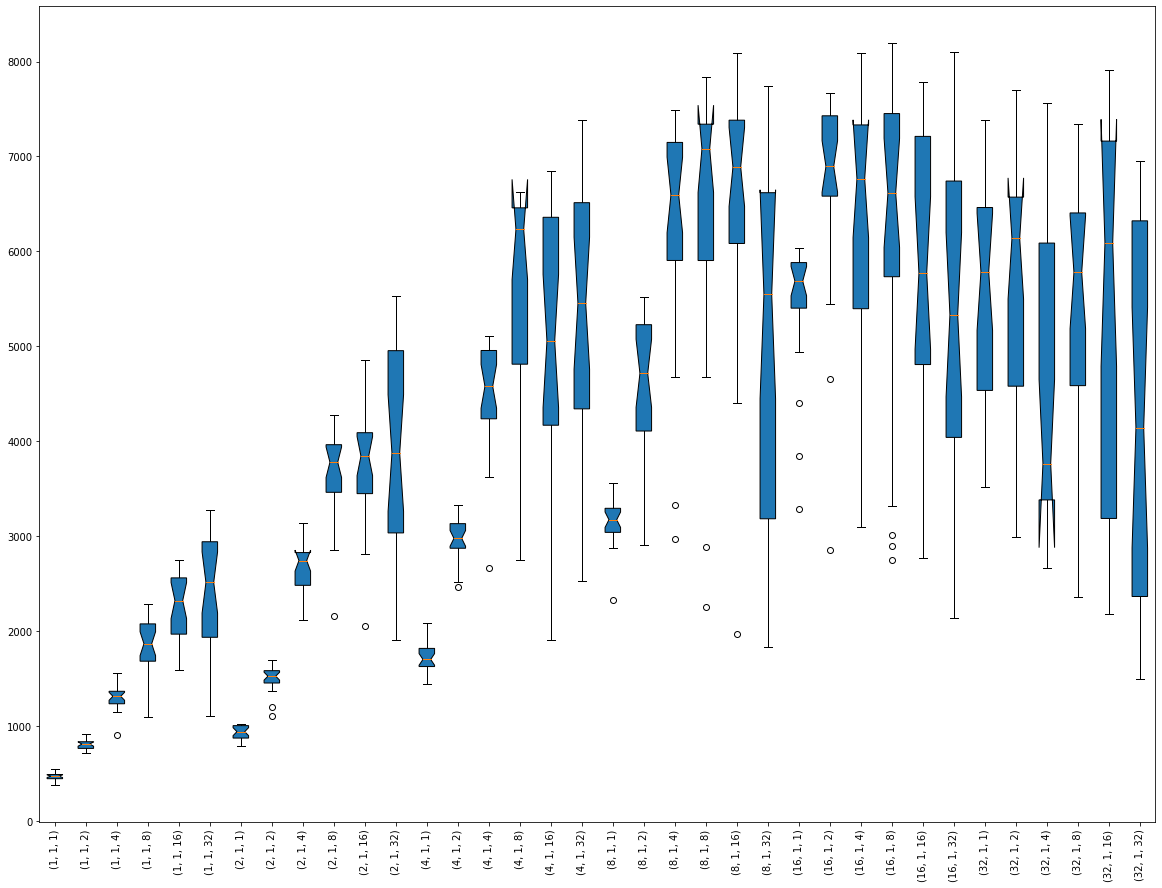

In [141]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
bp = ax.boxplot(key_specific_throughputs, patch_artist=True,
                notch='False', vert=1)
ax.set_xticklabels(keys)
plt.xticks(rotation=90)

# Following code is to check different properties of actual gym environment

In [ ]:
gym_env = NetEnvironment(selectedgroup)
obs_ = gym_env.reset()
print(obs_)
print(f"gym_env.observation_space.shape{gym_env.observation_space.shape}")
print(f"gym_env.action_space.shape{gym_env.action_space}")
for i in range(0, 100):
    current_observation, reward, done, info = gym_env.step(3)
    print(f"current_observation={current_observation} reward={reward} done={done} info={info}")


In [ ]:
action = gym_env.action_space.sample()
print(action)

# DQN implementation

In [ ]:
print(f"current_observation={type(current_observation)} reward={type(reward)} done={type(done)} info={type(info)}")

In [ ]:
import torch
from torch import nn
import torch.optim as optim
import gym
from collections import deque
import itertools
import numpy as np
import random

GAMMA = 0.99
BATCH_SIZE = 32
BUFFER_SIZE = 50000
MIN_REPLAY_SIZE = 10000
EPSILON_START = 1.0
EPSILON_END = 0.02
EPSILON_DECAY = 100000
TARGET_UPDATE_FREQ = 1000


class Network(nn.Module):
    def __init__(self, env):
        super().__init__()
        in_features = int(np.prod(env.obs_shape))
        self.net = nn.Sequential(
            nn.Linear(in_features, 64),
            nn.Tanh(),
            nn.Linear(64, env.action_space.n))

    def forward(self, x):
        return self.net(x)

    def act(self, obs):
        obs_t = torch.as_tensor(obs, dtype=torch.float32)
        q_values = self(obs_t.unsqueeze(0))
        max_q_index = torch.argmax(q_values, dim=1)[0]
        action = max_q_index.detach().item()

        return action

In [ ]:
env = NetEnvironment(selectedgroup)
TRAINING_STEPS = 170000
replay_buffer = deque(maxlen=BUFFER_SIZE)
rew_buffer = deque([0.0], maxlen=100)
episode_reward = 0.0
online_net = Network(env)
target_net = Network(env)
target_net.load_state_dict(online_net.state_dict())
optimizer = torch.optim.Adam(online_net.parameters(), lr=5e-4)
reward_per_episode = []
epsilon_per_episode = []
#### replay buffer initialize

obs = env.reset()
for _ in range(MIN_REPLAY_SIZE):
    action = env.action_space.sample()
    new_obs, rew, done, _ = env.step(action)
    transition = (obs, action, rew, done, new_obs)
    replay_buffer.append(transition)
    obs = new_obs
    if done:
        obs = env.reset()

    ###Main training

obs = env.reset()

# for step in itertools.count():
for step in range(TRAINING_STEPS):
    epsilon = np.interp(step, [0, EPSILON_DECAY], [EPSILON_START, EPSILON_END])
    rnd_sample = random.random()
    if rnd_sample <= epsilon:
        action = env.action_space.sample()
    else:
        action = online_net.act(obs)

    new_obs, rew, done, _ = env.step(action)
    transition = (obs, action, rew, done, new_obs)
    replay_buffer.append(transition)
    obs = new_obs
    episode_reward += rew
    if done:
        obs = env.reset()
        rew_buffer.append(episode_reward)
        reward_per_episode.append(episode_reward)
        epsilon_per_episode.append(epsilon)
        episode_reward = 0.0

    #### Satrt gradient Step
    transitions = random.sample(replay_buffer, BATCH_SIZE)
    #     print(transitions)
    obses = np.asarray([t[0] for t in transitions])
    actions = np.asarray([t[1] for t in transitions])
    rews = np.asarray([t[2] for t in transitions])
    dones = np.asarray([t[3] for t in transitions])
    new_obses = np.asarray([t[4] for t in transitions])

    obses_t = torch.as_tensor(obses, dtype=torch.float32)
    actions_t = torch.as_tensor(actions, dtype=torch.int64).unsqueeze(-1)
    rews_t = torch.as_tensor(rews, dtype=torch.float32).unsqueeze(-1)
    dones_t = torch.as_tensor(dones, dtype=torch.float32).unsqueeze(-1)
    new_obses_t = torch.as_tensor(new_obses, dtype=torch.float32)

    #compute Targets
    target_q_values = target_net(new_obses_t)
    max_target_q_values = target_q_values.max(dim=1, keepdim=True)[0]
    targets = rews_t + GAMMA * (1 - dones_t) * max_target_q_values

    # Compute Loss
    q_values = online_net(obses_t)
    action_q_values = torch.gather(input=q_values, dim=1, index=actions_t)
    loss = nn.functional.smooth_l1_loss(action_q_values, targets)

    ## Gradient Descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # update target network
    if step % TARGET_UPDATE_FREQ == 0:
        target_net.load_state_dict(online_net.state_dict())
    ##logging
    if step % 1000 == 0:
        print()
        print('step', step)
        print('Avg Rew', np.mean(rew_buffer))


In [ ]:
import matplotlib.pyplot as plt

reward_epsilon_values = []
reward_epsilon_values.append(reward_per_episode)
reward_epsilon_values.append(epsilon_per_episode)
labels = ["reward", "epsilon"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & epsilon-episodes graph DQN for selectedGroup')
for i, ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i], label=labels[i])
    axs[i].legend(loc="lower right")
print(env.environment_group_identification)
torch.save(online_net, "online_net")
torch.save(target_net, "target_net")
online_net = torch.load("online_net")
target_net = torch.load("target_net")

In [ ]:
TOTAL_EPISODES_VALIDATION = 10
reward_per_episode_validation = []
action_list_per_episode = []
for episode in range(TOTAL_EPISODES_VALIDATION):
    obs = env.reset()
    done = False
    episode_reward = 0
    action_list = []
    while (done == False):
        action = online_net.act(obs)
        action_list.append(action)
        new_obs, rew, done, _ = env.step(action)
        episode_reward += rew
        obs = new_obs
    reward_per_episode_validation.append(episode_reward)
    action_list_per_episode.append(action_list)

In [ ]:
reward_epsilon_values = []
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i, ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i], label=labels[i])
    axs[i].legend(loc="lower right")
print(env.environment_group_identification)

In [ ]:
action_dictionary = dict()

for action in range(env.action_space.n):
    value = env.actions[action]
    action_dictionary[action] = value
print(action_dictionary)

In [ ]:
def print_list_action(lst):
    return_list = []
    for i in lst:
        return_list.append(action_dictionary[i])
    return return_list


for i in range(len(action_list_per_episode)):
    print("Validation episode ", i, " actions taken")
    print(print_list_action(action_list_per_episode[i]))



# Following code checks the agent class implementation

In [ ]:
agent = DQNAgent(env)
agent.warming_replay_buffer()
agent.training()
agent.save_model()

In [ ]:
agent.plot_training_curve()

In [ ]:
# agent.load_model('agent(32, 34.9238114, 40, 10, 30)online_net','agent(32, 34.9238114, 40, 10, 30)target_net')
reward_per_episode_validation, action_list_per_episode = agent.validation()
agent.print_action_list_for_validation_episodes(action_list_per_episode)
agent.plot_validation_curve()

# Agent with Higher Epsilon decay

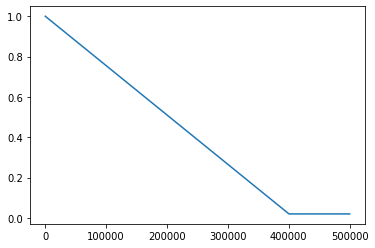

In [181]:
EPSILON_START = 1.0
EPSILON_END = 0.02
EPSILON_DECAY = 400000
epsilon_value = []
for step in range(500000):
    epsilon_value.append(np.interp(step, [0, EPSILON_DECAY], [EPSILON_START, EPSILON_END]))
plt.plot(epsilon_value)

In [182]:
env = NetEnvironment(selectedgroup)
agent = DQNAgent(env, EPSILON_DECAY=400000)
agent.warming_replay_buffer()
agent.training(TRAINING_STEPS=500000)
agent.save_model()


step 0
Avg Rew 0.0

step 1000
Avg Rew 45.468569888416475

step 2000
Avg Rew 48.32454170058777

step 3000
Avg Rew 49.11141730436698

step 4000
Avg Rew 49.556002439874554


KeyboardInterrupt: 

In [ ]:
agent.plot_training_curve()

In [ ]:
# agent.load_model('agent(32, 34.9238114, 40, 10, 30)online_net','agent(32, 34.9238114, 40, 10, 30)target_net')
reward_per_episode_validation, action_list_per_episode = agent.validation()
agent.print_action_list_for_validation_episodes(action_list_per_episode)
agent.plot_validation_curve()

# previous emplementations

In [198]:
class ReplayBuffer(object):
    def __init__(self, max_size, input_shape):
        self.max_buffer_size = max_size
        self.buffer_size = 0
        self.state_list = np.zeros((self.max_buffer_size, *input_shape), dtype=np.float32)
        self.new_state_list = np.zeros((self.max_buffer_size, *input_shape), dtype=np.float32)
        self.action_list = np.zeros(self.max_buffer_size, dtype=np.int64)
        self.reward_list = np.zeros(self.max_buffer_size, dtype=np.float32)
        self.done_list = np.zeros(self.max_buffer_size, dtype=np.uint8)

    def add_transition(self, obs, action, reward, new_obs, done):
        index = self.buffer_size % self.max_buffer_size
        self.state_list[index] = obs
        self.new_state_list[index] = new_obs
        self.reward_list[index] = reward
        self.action_list[index] = action
        self.done_list[index] = done
        self.buffer_size += 1

    def sample(self, batch_size):
        max_mem = min(self.buffer_size, self.max_buffer_size)
        idx = np.random.choice(max_mem, batch_size, replace=False)
        states = self.state_list[idx]
        actions = self.action_list[idx]
        rewards = self.reward_list[idx]
        new_states = self.new_state_list[idx]
        dones = self.done_list[idx]
        return states, actions, rewards, new_states, dones


def print_step_avg_reward(episode, reward_buffer, epsilon):
    print('\nEpisode', episode)
    print('Last Epsilon: ', epsilon)
    print('Avg Reward: ', np.mean(reward_buffer))


class DuelingDQN(nn.Module):
    def __init__(self, alpha, n_actions, input_dims, layer_dims):
        super(DuelingDQN, self).__init__()
        self.net_1 = nn.Linear(*input_dims, layer_dims)
        self.net_2 = nn.Linear(layer_dims, layer_dims)
        self.value = nn.Linear(layer_dims, 1)
        self.actionation = nn.Linear(layer_dims, n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.loss = nn.MSELoss()

    def forward(self, state):
        l1 = F.relu(self.net_1(state))  #activate the first layers state
        l2 = F.relu(self.net_2(l1))  #next activation
        val = self.value(l2)
        act = self.actionation(l2)
        return val, act


class DuelingDQNAgent(object):
    def __init__(self, agent_env, alpha, n_actions, input_dims, gamma=.99, mem_size=50000, batch_size=32, layer_dims=64,
                 epi_min=0.02, epsilon_ddqn=1.0, replace=10000):
        self.gamma = gamma
        self.env = agent_env
        self.epsilon = epsilon_ddqn
        self.epsilon_list = [epsilon_ddqn]
        self.reward_list = []
        self.alpha = alpha
        self.epi_min = epi_min
        self.batch_size = batch_size
        self.action_space = [i for i in range(n_actions)]
        self.step_counter = 0
        self.replace_target_count = replace
        self.replay_buffer = ReplayBuffer(mem_size, input_dims)
        self.online_net = DuelingDQN(alpha, n_actions, input_dims=input_dims, layer_dims=layer_dims)
        self.target_net = DuelingDQN(alpha, n_actions, input_dims=input_dims, layer_dims=layer_dims)

    def validation(self, episodes=10):
        local_episode_reward = []
        loca_action_list = []
        self.env.reset()
        for idx in range(episodes):
            obs_local = self.env.reset()
            done_local = False
            episode_reward_local = 0
            while not done_local:
                action_local = self.choose_action(obs_local)
                print(action_local)
                loca_action_list.append(action_local)
                new_obs_local, rew_local, done_local, _ = self.env.step(action_local)
                episode_reward_local += rew_local
                obs_local = new_obs_local
            local_episode_reward.append(episode_reward_local)

        return local_episode_reward, loca_action_list

    def add_transition(self, state, action, reward, new_state, done):
        self.replay_buffer.add_transition(state, action, reward, new_state, done)

    def choose_action(self, obs):
        if np.random.random() > self.epsilon:
            obs = obs[np.newaxis, :]
            state = T.tensor(obs)
            _, advantage = self.online_net.forward(state.float())
            action = T.argmax(advantage).item()
        else:
            action = np.random.choice(self.action_space)
        return action

    def replace_target_net(self):
        if self.replace_target_count is not None:
            if self.step_counter % self.replace_target_count == 0:
                self.target_net.load_state_dict(self.online_net.state_dict())

    def decrement_epsilon(self, local_episode):
        if self.epsilon > self.epi_min:
            self.epsilon_list.append(1 * .99 ** local_episode)
            self.epsilon = self.epsilon_list[-1]
        else:
            self.epsilon = self.epi_min
            self.epsilon_list.append(self.epsilon)

    def warm_buffer(self):
        obs = self.env.reset()
        for _ in range(10000):
            action = self.env.action_space.sample()
            new_obs, rew, done, _ = self.env.step(action)
            self.replay_buffer.add_transition(obs, action, rew, new_obs, done)
            obs = new_obs
            if done:
                obs = self.env.reset()

    def learn(self, episode):
        if self.replay_buffer.buffer_size < self.batch_size:
            return
        self.online_net.optimizer.zero_grad()
        self.replace_target_net()
        state, action_local, reward_local, new_state, done_local = self.replay_buffer.sample(self.batch_size)

        state = T.tensor(state)
        new_state = T.tensor(new_state)
        action_local = T.tensor(action_local)
        reward_local = T.tensor(reward_local)
        done_local = T.tensor(done_local)

        value_local, activate = self.online_net.forward(state)
        new_value, new_activate = self.target_net.forward(new_state)

        q_pred = T.add(value_local, (activate - activate.mean(dim=1, keepdim=True))).gather(-1, action_local.unsqueeze(
            -1)).squeeze(
            -1)
        target_net_local = T.add(new_value, (new_activate - activate.mean(dim=1, keepdim=True)))

        q_target = reward_local + self.gamma * T.max(target_net_local, dim=1)[0].detach()
        q_target[done_local] = 0.0

        loss_local = self.online_net.loss(q_target, q_pred)
        loss_local.backward()
        # self.decrement_epsilon(episode)
        self.online_net.optimizer.step()
        self.step_counter += 1

In [196]:
def run_duelingDQN(local_env, agent_ddqn, episodes=1000):
    local_env.reset()
    episode_reward_list = []
    agent_ddqn.warm_buffer()
    for idx in range(episodes):
        done_local = False
        episode_reward_local = 0
        obs_local = local_env.reset()
        while not done_local:
            action_local = agent_ddqn.choose_action(obs_local)
            new_obs_local, reward_local, done_local, info_local = local_env.step(action_local)
            episode_reward_local += reward_local
            agent_ddqn.add_transition(obs_local, action_local, reward_local, new_obs_local, done_local)
            agent_ddqn.learn(idx)
            obs_local = new_obs_local

        agent_ddqn.decrement_epsilon(idx)
        episode_reward_list.append(episode_reward_local)
        avg_score = np.mean(episode_reward_list[-100:])
        if idx % 10 == 0:
            print_step_avg_reward(idx, avg_score, agent_ddqn.epsilon)

        avg_score = np.mean(episode_reward_list[-100:])
        if avg_score >= 470:
            break
    agent_ddqn.reward_list = episode_reward_list
    return episode_reward_list, agent_ddqn


def graph(reward_list_local, epsilon_list, env_name):
    plt.title('Reward Plot Dueling DQN ' + env_name)
    plt.plot(reward_list_local)
    plt.xlabel('episodes')
    plt.ylabel('reward')
    plt.show()
    if len(epsilon_list) > 0:
        plt.title('Epsilon Plot Dueling DQN ' + env_name)
        plt.plot(epsilon_list)
        plt.xlabel('episodes')
        plt.ylabel('epsilon')
        plt.show()

/var/folders/rn/lb6d61xx4_j9fhhnzl_6wkk40000gn/T/ipykernel_80399/2538422251.py:147: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  q_target[done_local] = 0.0



Episode 0
Last Epsilon:  1.0
Avg Reward:  49.59887671456218

Episode 10
Last Epsilon:  0.9043820750088044
Avg Reward:  51.59743930239351

Episode 20
Last Epsilon:  0.8179069375972308
Avg Reward:  52.52926299028867

Episode 30
Last Epsilon:  0.7397003733882802
Avg Reward:  52.81415779864563

Episode 40
Last Epsilon:  0.6689717585696803
Avg Reward:  53.14485168408523

Episode 50
Last Epsilon:  0.6050060671375364
Avg Reward:  53.627202118934036

Episode 60
Last Epsilon:  0.5471566423907612
Avg Reward:  53.9718075824643

Episode 70
Last Epsilon:  0.49483865960020695
Avg Reward:  54.47100224642759

Episode 80
Last Epsilon:  0.4475232137638106
Avg Reward:  54.74455057818099

Episode 90
Last Epsilon:  0.4047319726783238
Avg Reward:  55.09800566015434

Episode 100
Last Epsilon:  0.3660323412732292
Avg Reward:  55.60371234471239

Episode 110
Last Epsilon:  0.33103308832101386
Avg Reward:  57.21895040390739

Episode 120
Last Epsilon:  0.2993803913123313
Avg Reward:  58.94066930623734

Episode 1

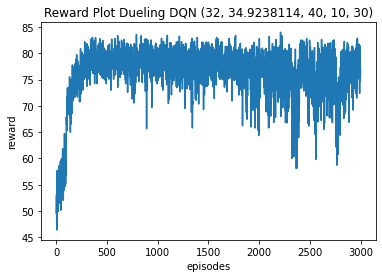

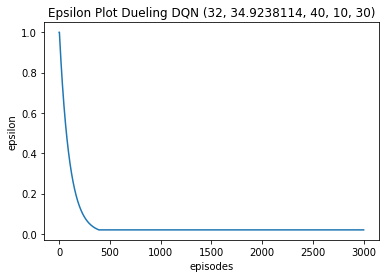

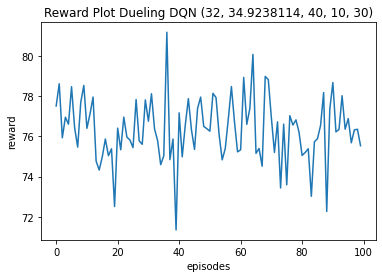

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [162]:
env_list = []
key_list = []
counter = 0
for key in filedata_grouped_df.groups.keys():
    local_cc_pp_p_group = environmentGroup(fileData_chameleon.get_grouped_df(), key)
    env_list.append(NetEnvironment(local_cc_pp_p_group))
    key_list.append(key)
    counter += 1
    break

duelingAgent = DuelingDQNAgent(gamma=0.99, alpha=5e-4, input_dims=[np.prod(env_list[0].obs_shape)],
                               n_actions=env_list[0].action_space.n, agent_env=env_list[0])

cartpole_ddqn_reward_list, duelingAgent = run_duelingDQN(env_list[0], agent_ddqn=duelingAgent, episodes=3000)
graph(cartpole_ddqn_reward_list, duelingAgent.epsilon_list, str(key))
episode_reward_ddqn, action_list_ddqn = duelingAgent.validation(episodes=100)
graph(episode_reward_ddqn, [], str(key))

/var/folders/rn/lb6d61xx4_j9fhhnzl_6wkk40000gn/T/ipykernel_80399/2650527120.py:146: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  q_target[done_local] = 0.0



Episode 0
Last Epsilon:  1.0
Avg Reward:  47.994494060727504

Episode 10
Last Epsilon:  0.9043820750088044
Avg Reward:  51.395036025205336

Episode 20
Last Epsilon:  0.8179069375972308
Avg Reward:  52.24187706795495

Episode 30
Last Epsilon:  0.7397003733882802
Avg Reward:  52.797360192881875

Episode 40
Last Epsilon:  0.6689717585696803
Avg Reward:  53.416828992445105

Episode 50
Last Epsilon:  0.6050060671375364
Avg Reward:  54.24464080802982

Episode 60
Last Epsilon:  0.5471566423907612
Avg Reward:  54.503187063033664

Episode 70
Last Epsilon:  0.49483865960020695
Avg Reward:  55.28031934644957

Episode 80
Last Epsilon:  0.4475232137638106
Avg Reward:  55.76879999764663

Episode 90
Last Epsilon:  0.4047319726783238
Avg Reward:  56.35270757742172

Episode 100
Last Epsilon:  0.3660323412732292
Avg Reward:  56.91294948903097

Episode 110
Last Epsilon:  0.33103308832101386
Avg Reward:  58.61470724418977

Episode 120
Last Epsilon:  0.2993803913123313
Avg Reward:  60.19827116880155

Epis

/var/folders/rn/lb6d61xx4_j9fhhnzl_6wkk40000gn/T/ipykernel_80399/2650527120.py:146: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  q_target[done_local] = 0.0



Episode 0
Last Epsilon:  1.0
Avg Reward:  94.37692165088528

Episode 10
Last Epsilon:  0.9043820750088044
Avg Reward:  94.66563391221575

Episode 20
Last Epsilon:  0.8179069375972308
Avg Reward:  94.7914318699672

Episode 30
Last Epsilon:  0.7397003733882802
Avg Reward:  94.87360390645414

Episode 40
Last Epsilon:  0.6689717585696803
Avg Reward:  94.94122864873034

Episode 50
Last Epsilon:  0.6050060671375364
Avg Reward:  95.01158631364375

Episode 60
Last Epsilon:  0.5471566423907612
Avg Reward:  95.07440950500815

Episode 70
Last Epsilon:  0.49483865960020695
Avg Reward:  95.15264300320104

Episode 80
Last Epsilon:  0.4475232137638106
Avg Reward:  95.22567795515067

Episode 90
Last Epsilon:  0.4047319726783238
Avg Reward:  95.30676140137193

Episode 100
Last Epsilon:  0.3660323412732292
Avg Reward:  95.380404476797

Episode 110
Last Epsilon:  0.33103308832101386
Avg Reward:  95.48872379163399

Episode 120
Last Epsilon:  0.2993803913123313
Avg Reward:  95.55779665912846

Episode 130


/var/folders/rn/lb6d61xx4_j9fhhnzl_6wkk40000gn/T/ipykernel_80399/2650527120.py:146: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  q_target[done_local] = 0.0



Episode 0
Last Epsilon:  1.0
Avg Reward:  100.0

Episode 10
Last Epsilon:  0.9043820750088044
Avg Reward:  100.0

Episode 20
Last Epsilon:  0.8179069375972308
Avg Reward:  100.0

Episode 30
Last Epsilon:  0.7397003733882802
Avg Reward:  100.0

Episode 40
Last Epsilon:  0.6689717585696803
Avg Reward:  100.0

Episode 50
Last Epsilon:  0.6050060671375364
Avg Reward:  100.0

Episode 60
Last Epsilon:  0.5471566423907612
Avg Reward:  100.0

Episode 70
Last Epsilon:  0.49483865960020695
Avg Reward:  100.0

Episode 80
Last Epsilon:  0.4475232137638106
Avg Reward:  100.0

Episode 90
Last Epsilon:  0.4047319726783238
Avg Reward:  100.0

Episode 100
Last Epsilon:  0.3660323412732292
Avg Reward:  100.0

Episode 110
Last Epsilon:  0.33103308832101386
Avg Reward:  100.0

Episode 120
Last Epsilon:  0.2993803913123313
Avg Reward:  100.0

Episode 130
Last Epsilon:  0.27075425951199406
Avg Reward:  100.0

Episode 140
Last Epsilon:  0.24486529903492948
Avg Reward:  100.0

Episode 150
Last Epsilon:  0.22

/var/folders/rn/lb6d61xx4_j9fhhnzl_6wkk40000gn/T/ipykernel_80399/2650527120.py:146: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  q_target[done_local] = 0.0



Episode 0
Last Epsilon:  1.0
Avg Reward:  56.10769907059984

Episode 10
Last Epsilon:  0.9043820750088044
Avg Reward:  55.03120078841052

Episode 20
Last Epsilon:  0.8179069375972308
Avg Reward:  54.70035594802331

Episode 30
Last Epsilon:  0.7397003733882802
Avg Reward:  54.85730911589262

Episode 40
Last Epsilon:  0.6689717585696803
Avg Reward:  54.96709993671878

Episode 50
Last Epsilon:  0.6050060671375364
Avg Reward:  55.0396373782737

Episode 60
Last Epsilon:  0.5471566423907612
Avg Reward:  55.01198669280629

Episode 70
Last Epsilon:  0.49483865960020695
Avg Reward:  54.870540651252476

Episode 80
Last Epsilon:  0.4475232137638106
Avg Reward:  54.821157526087696

Episode 90
Last Epsilon:  0.4047319726783238
Avg Reward:  54.83168267100063

Episode 100
Last Epsilon:  0.3660323412732292
Avg Reward:  54.747153148822456

Episode 110
Last Epsilon:  0.33103308832101386
Avg Reward:  55.815292918956175

Episode 120
Last Epsilon:  0.2993803913123313
Avg Reward:  56.74123936063624

Episod

/var/folders/rn/lb6d61xx4_j9fhhnzl_6wkk40000gn/T/ipykernel_80399/2650527120.py:146: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  q_target[done_local] = 0.0



Episode 0
Last Epsilon:  1.0
Avg Reward:  86.9263523077208

Episode 10
Last Epsilon:  0.9043820750088044
Avg Reward:  87.99362450593989

Episode 20
Last Epsilon:  0.8179069375972308
Avg Reward:  88.37414789832842

Episode 30
Last Epsilon:  0.7397003733882802
Avg Reward:  88.96227668292232

Episode 40
Last Epsilon:  0.6689717585696803
Avg Reward:  89.45565222166611

Episode 50
Last Epsilon:  0.6050060671375364
Avg Reward:  89.96935326104514

Episode 60
Last Epsilon:  0.5471566423907612
Avg Reward:  90.31504305550109

Episode 70
Last Epsilon:  0.49483865960020695
Avg Reward:  90.78960325653317

Episode 80
Last Epsilon:  0.4475232137638106
Avg Reward:  91.16290194337405

Episode 90
Last Epsilon:  0.4047319726783238
Avg Reward:  91.5420861211251

Episode 100
Last Epsilon:  0.3660323412732292
Avg Reward:  91.9411887325273

Episode 110
Last Epsilon:  0.33103308832101386
Avg Reward:  92.35030486851143

Episode 120
Last Epsilon:  0.2993803913123313
Avg Reward:  92.78187978051476

Episode 130


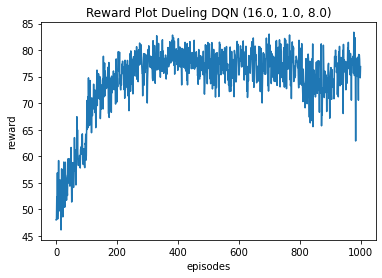

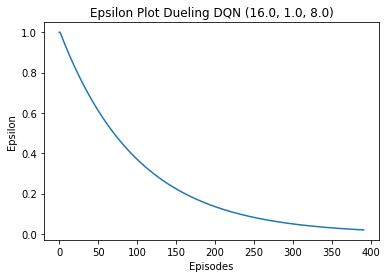

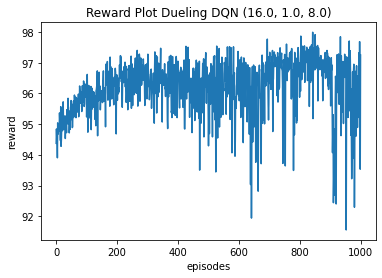

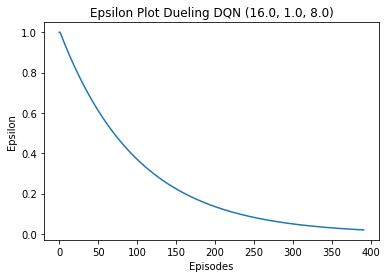

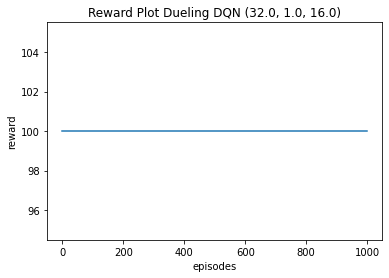

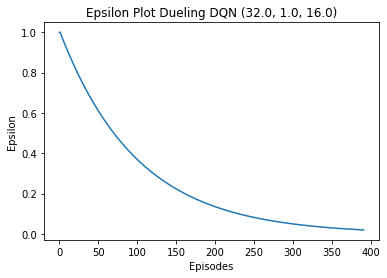

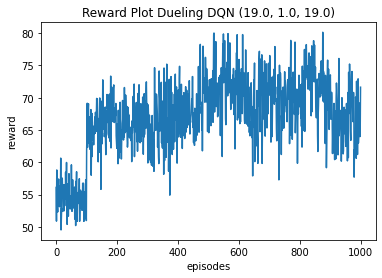

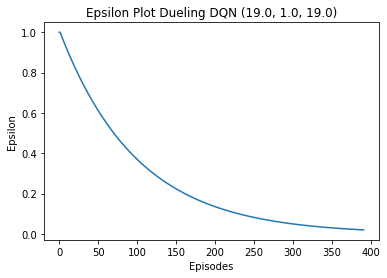

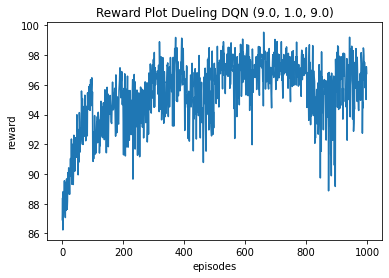

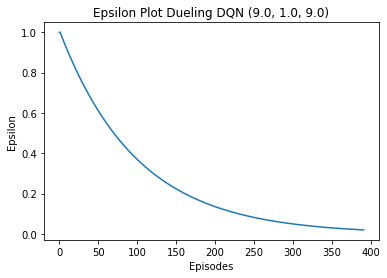

In [159]:
def graph_dueling_group(local_agent, local_env):
    plt.title('Reward Plot Dueling DQN ' + str(local_env.environment_group_identification()))
    plt.plot(local_agent.reward_list)
    # plt.axhline(y=local_env.max_throughput, linestyle='-')
    plt.xlabel('episodes')
    plt.ylabel('reward')
    plt.show()

    plt.title('Epsilon Plot Dueling DQN ' + str(local_env.environment_group.return_group_max_throughput_parameters()))
    plt.plot(local_agent.epsilon_list)
    plt.ylabel('Epsilon')
    plt.xlabel('Episodes')
    plt.show()


class GroupedDuelingDQN:
    # inputs: an environment, group_num
    def __init__(self, env_list, key_list):
        self.env_list = env_list
        self.key_list = key_list
        self.agent_list = []

    def train_all(self, env_number=5):
        total_reward_list_local = []
        for idx_local, env_dueling in enumerate(self.env_list[0:env_number]):
            dueling_Agent = DuelingDQNAgent(gamma=0.99, alpha=5e-4, input_dims=[np.prod(env_dueling.obs_shape)],
                                            n_actions=env_dueling.action_space.n, agent_env=env_dueling)

            total_reward_ddn_list, dueling_Agent = run_duelingDQN(local_env=env_dueling,
                                                                  agent_ddqn=dueling_Agent, episodes=1000)
            dueling_Agent.reward_list = total_reward_ddn_list
            self.agent_list.append(dueling_Agent)
            total_reward_list_local += total_reward_ddn_list

        return total_reward_list_local


env_list = []
key_list = []
counter = 0

for key in filedata_grouped_df.groups.keys():
    local_cc_pp_p_group = environmentGroup(fileData_chameleon.get_grouped_df(), key)
    env_list.append(NetEnvironment(local_cc_pp_p_group))
    key_list.append(counter)
    counter += 1
group_agents = GroupedDuelingDQN(env_list, key_list)
total_reward_list = group_agents.train_all(env_number=5)

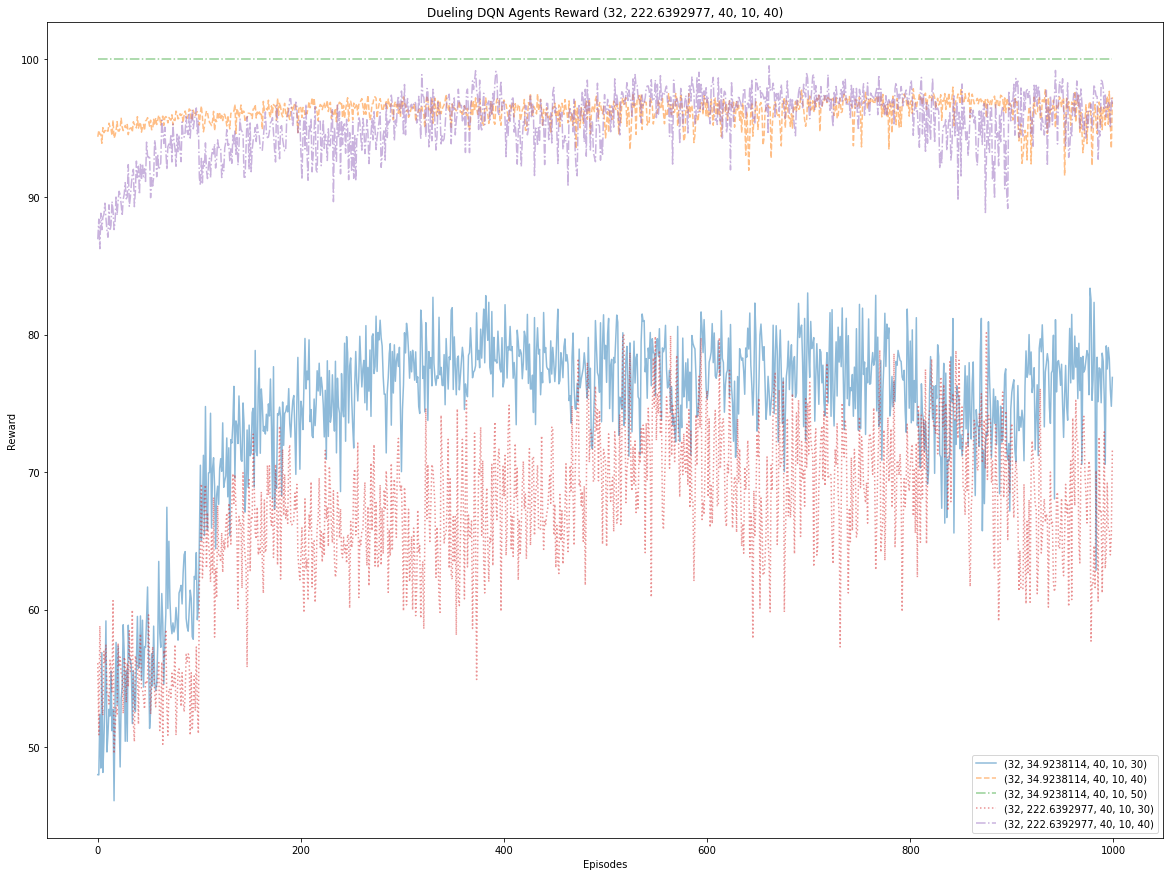

[[(8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (2, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (32, 1, 4), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (32, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1,

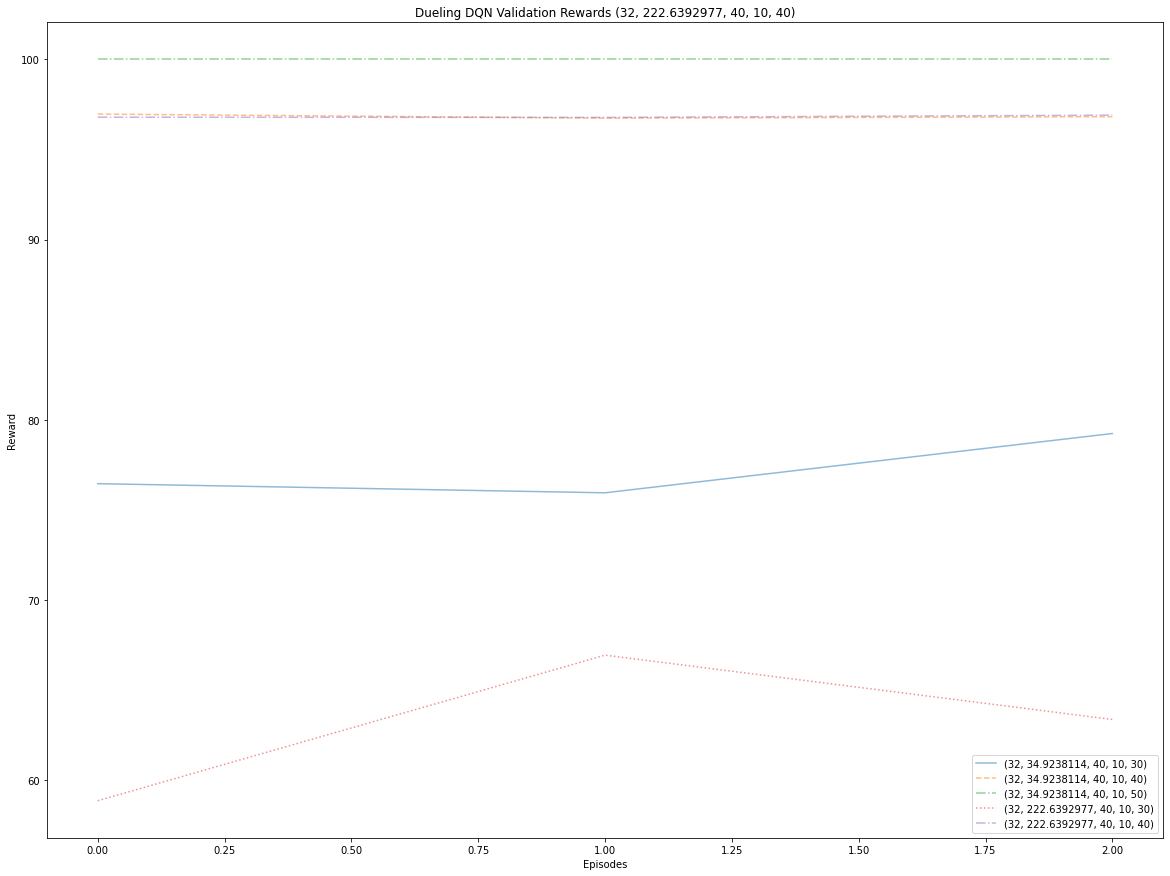

[((32, 34.9238114, 40, 10, 30), 8191.376288, (16.0, 1.0, 8.0), [[(8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (2, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (32, 1, 4), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (8, 1, 8), (32, 1, 8), (8, 1, 8)

In [216]:
from itertools import chain
def validate(ddqn_agent, episodes=10):
    local_episode_reward = []
    loca_action_list = []
    ddqn_agent.env.reset()
    for idx in range(episodes):
        obs_local = ddqn_agent.env.reset()
        done_local = False
        episode_reward_local = 0
        action_list = []
        while not done_local:
            action_local = ddqn_agent.choose_action(obs_local)
            new_obs_local, rew_local, done_local, _ = ddqn_agent.env.step(action_local)
            action_list.append(ddqn_agent.env.actions[action_local])
            episode_reward_local += rew_local
            obs_local = new_obs_local
        local_episode_reward.append(episode_reward_local)
        loca_action_list.append(action_list)
    return local_episode_reward, loca_action_list


linestyle = ["-", "--", "-.", ":", "dashdot"]
fig = plt.figure(figsize=(20, 15))
for idx, agent in enumerate(group_agents.agent_list):
    # graph_dueling_group(group_agents.agent_list[idx], group_agents.env_list[idx])
    plt.title("Dueling DQN Agents Reward " + str(agent.env.environment_group_identification))
    plt.ylabel("Reward")
    plt.xlabel("Episodes")
    plt.plot(agent.reward_list, label=str(agent.env.environment_group_identification), linestyle=linestyle[idx],
             alpha=0.5)
plt.legend()
plt.savefig("DDQNRewardPlot.png")
plt.show()
fig = plt.figure(figsize=(20, 15))
total_action_list = []
for idx, agent in enumerate(group_agents.agent_list):
    plt.title("Dueling DQN Validation Rewards " + str(str(agent.env.environment_group_identification)))
    plt.ylabel("Reward")
    plt.xlabel("Episodes")
    episode_reward_ddqn_local, ddqn_action_list = validate(agent, 3)
    print(ddqn_action_list)
    plt.plot(episode_reward_ddqn_local, label=str(agent.env.environment_group_identification), linestyle=linestyle[idx],
             alpha=0.5)
    tup = (agent.env.environment_group_identification, agent.env.max_throughput, agent.env.max_throughput_parameters,
           ddqn_action_list)
    total_action_list.append(tup)
plt.legend()
plt.savefig("DDQNValidationGraph.png")
plt.show()
print(total_action_list)
# graph(episode_reward_ddqn_local, [], str(agent.env.environment_group_identification))